
-------------------------------------------------------------------------------------------------------------------------------
<b>The Sparks Foundation: Data Science & Business Analytics</b>

Submitted by: Vardan Gupta ( vardangupta00@gmail.com )

Batch: July 21

Task-2: Prediction using Unsupervised ML

Description: Predicting the category of IRIS flower using K.Means.Clustering Unsupervised Algorithm.

Resourses used: IRIS.csv 

-------------------------------------------------------------------------------------------------------------------------------
    

<b>Importing Libraries</b>

In [1]:
#Importing Libraries Required For Program
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

<b>Reading the Dataset</b>

In [2]:
#Fetching dataset from CSV file
dataset = pd.read_csv('Iris.csv')

<b>Printing The Data</b>

In [3]:
#printing the Data
dataset.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<b>Information About Dataset</b>

In [4]:
#Printing Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<b>Counting data distributed on the basis of 'Species' column</b>

In [5]:
#counting Data based on Species
print(dataset.Species.value_counts())

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


<b>Cleansing the Dataset</b>

In [6]:
#data cleaning is the process of detecting and removing corrupt or inaccurate records from a Dataset.
dataset.drop("Id",inplace=True,axis=1)
dataset.drop("Species",inplace=True,axis=1)

<b>Displaying the new Dataset</b>

In [7]:
#printing the Data
dataset.head(150)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<h1><b>K-Means Clustering Unsupervised Learning Algorithm</b></h1>

<b>Initializing the Number of clusters, and Calculating the 'Euclidean distance'</b>

In [8]:
#Calculating the 'within cluster sum of square' or 'Euclidean distance' 
within_cluster_sum_of_square=[]
#Defining the number(range)of clusters
clusters_range = range(1,15)
for i in clusters_range:
    km = KMeans(n_clusters=i)
    km = km.fit(dataset)
    within_cluster_sum_of_square.append(km.inertia_)

<b>Plotting the graph between 'cluster Number' vs 'within cluster sum of square'</b>

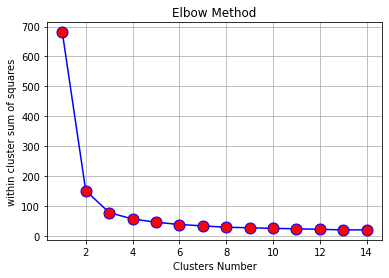

In [9]:
#Plotting the 'within cluster sum of square' vs 'cluster Number' graph
plt.plot(clusters_range, within_cluster_sum_of_square, 'bo-', markerfacecolor='r',  markersize=11)
plt.title('Elbow Method')
plt.xlabel('Clusters Number')
plt.ylabel('within cluster sum of squares')
plt.grid()
plt.show()

<b>Applying k-Means Clustering Unsupervised Learning algorithm on the dataset</b>

In [10]:
#Applying KMeans Clustering the dataset
model=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
predictions=model.fit_predict(dataset)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


<b>Ploting the Scatter Plot Graph for the Resulting Clusters</b>

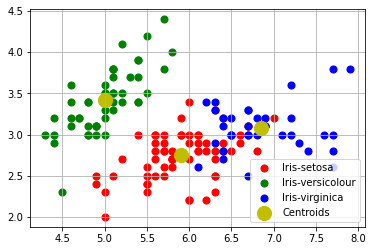

In [11]:
#Visualizing the data
x = dataset.iloc[:, [0, 1, 2, 3]].values
plt.scatter(x[predictions==0,0],x[predictions==0,1],s=50,color='r',label='Iris-setosa')
plt.scatter(x[predictions==1,0],x[predictions==1,1],s=50,color='g',label='Iris-versicolour')
plt.scatter(x[predictions==2,0],x[predictions==2,1],s=50,color='b',label='Iris-virginica')
#Plotting the clusters  centroids
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s=200,color='y',label='Centroids')
plt.grid()
plt.legend()
plt.show()

<b>----------------------------------------------------------------------------------------------TASK2 COMPLETED---------------------------------------------------------------------------------------</b>